In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle

# Problem setup

In [8]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 1.0, 1.1, samples=4)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

# COLLISION SCENE
sc1 = [Rectangle(3.7, 1.3, 2, 1, -0.1)]

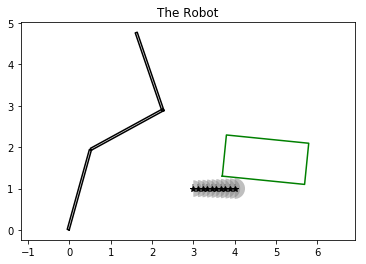

In [9]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
plt.show()

# Solve problem
## Sampling based

In [10]:
from ppr.path import cart_to_joint
from ppr.path import get_shortest_path

In [11]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

In [12]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[ 0 56 20  2 52 50 50 50 24  0]
True


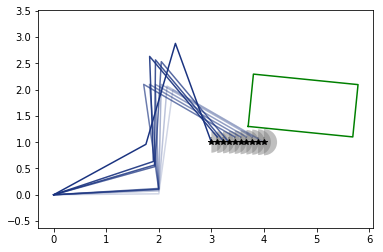

In [20]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path_kinematics(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

## Optimisation based

In [14]:
from ppr.optim import get_optimal_trajectory

In [17]:
q_init = sol['path']
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, check_collision=True, scene=sc1)

Iteration limit exceeded    (Exit mode 9)
            Current function value: 0.7847583276699399
            Iterations: 101
            Function evaluations: 3316
            Gradient evaluations: 100


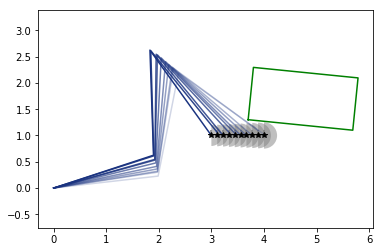

In [18]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
robot1.plot_path_kinematics(ax3, q_opt)
for r in sc1: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()